**1.** **Team Name:** Wasa-Bee!




**2. Team Members:**

Shang-Nung Hsu, Vy Nguyen, Akhil Dintakurthi, Taksh Hasija



**3. Executive Summary:**

Embarking on our entrepreneurial journey, our startup is setting its sights on crafting a unique sushi bar experience, and our chosen canvas is the vibrant state of Pennsylvania. With the goal of identifying the perfect locale for our upcoming venture, our extensive exploratory data analysis (EDA) honed in on the diverse tapestry of zip codes within the chosen state. Leveraging insightful visualizations and data manipulation techniques, we sought to unravel the culinary preferences and geographical nuances that would guide us to the ideal location for our sushi bar. This strategic approach not only aligns with our vision for an exceptional dining experience but also positions us for success in catering to the tastes of the local community within the dynamic landscape of Pennsylvania. Our EDA serves as the compass navigating us towards a strategic and informed decision on where to unfold the doors of our exciting new sushi bar venture.


**4.Data Sources used for EDA:**

**4.1.Data files used from the yelp dataset:**
*   yelp_academic_dataset_business.json
*   yelp_academic_dataset_review.json

**4.2.The filtering/selection criteria we applied to the Yelp data:**

***a.Data Import and Initial Exploration:***

- Imported Yelp business data from a JSON file.
- Checked for missing values in relevant columns, ensuring data completeness and integrity.

***b.Data Cleaning and Preprocessing:***

- Selected key columns for analysis, including business ID, name, city, state, postal code, star ratings, review count, categories, and operational status (open/closed).
- Addressed missing values in postal code and categories, dropping rows with incomplete information.
- Standardized text data by converting to lowercase and removing unnecessary whitespace for consistency in further analysis.

***c.Exploratory Data Analysis (EDA) on Sushi Restaurants:***

- Filtered businesses related to sushi or Japanese cuisine, conducting EDA to understand their distribution across states.
- Visualized the top 10 states and cities with the highest number of sushi or Japanese restaurants, providing valuable insights for decision-making.

***d.Focused Analysis on Pennsylvania (PA):***

- Narrowed the focus to Pennsylvania (PA) and identified the top 30 postal codes with the highest concentration of sushi or Japanese restaurants.
- Explored the distribution of open and closed sushi establishments within the top 30 postal codes, visualizing the information through a stacked histogram.

***e.Integration with Review Data:***

- Merged the filtered sushi restaurant data with Yelp review data based on business ID, creating a comprehensive dataset for deeper analysis.
- Renamed the 'stars' column in the review dataset to 'user_rating' for consistency with the business dataset.

***f.Data Export:***

- Exported the refined and merged dataset to a CSV file ('filtered_sushi_pa_reviews.csv') for further analysis and external use, ensuring accessibility and convenience.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette to use
color_palette = sns.color_palette("viridis", as_cmap=False)  # You can choose any palette you like

sushi_df = pd.read_csv('filtered_sushi_pa_reviews.csv')

**5. Summary Statistics of the Data**

**A. Number of reviews**

In [ ]:
print("The Total Number of Reviews in Our Filtered Dataset:", sushi_df.shape[0], "\n")

print("Filtered Data Set Info:")
print(sushi_df.info(), "\n")

print(sushi_df.head())

The Total Number of Reviews in Our Filtered Dataset: 73601 

Filtered Data Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73601 entries, 0 to 73600
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   73601 non-null  object 
 1   name          73601 non-null  object 
 2   address       73425 non-null  object 
 3   city          73601 non-null  object 
 4   state         73601 non-null  object 
 5   postal_code   73601 non-null  int64  
 6   latitude      73601 non-null  float64
 7   longitude     73601 non-null  float64
 8   stars         73601 non-null  float64
 9   review_count  73601 non-null  int64  
 10  is_open       73601 non-null  int64  
 11  attributes    73582 non-null  object 
 12  categories    73601 non-null  object 
 13  hours         70177 non-null  object 
 14  review_id     73601 non-null  object 
 15  user_id       73601 non-null  object 
 16  user_rating   73601 non-nul

**B.Total number of tokens**

In [ ]:
total_tokens = sushi_df['text'].str.split().map(len).sum()
print("The Total Number of Tokens:",total_tokens)

The Total Number of Tokens: 7550024


**C.Number of unique words**

In [ ]:
import re

def count_unique_words(file_path):
    # Read the dataset into a DataFrame
    df = pd.read_csv(file_path)

    # Combine all text from the 'text' column into a single string
    all_text = ' '.join(df['text'].astype(str))

    # Text preprocessing
    all_text = all_text.lower()
    words = re.findall(r'\b\w+\b', all_text)
    # Remove stopwords if needed

    # Count unique words
    unique_word_count = len(set(words))

    return unique_word_count

# Example usage
dataset_file_path = 'filtered_sushi_pa_reviews.csv'
unique_word_count = count_unique_words(dataset_file_path)
print("Number of unique words in the dataset:", unique_word_count)

Number of unique words in the dataset: 43905


**D. Average Review Length**

In [ ]:
sushi_df['word_count'] = sushi_df['text'].apply(lambda x: len(x.split()))
average_words_per_review = sushi_df['word_count'].mean()
print(f"Average Number of Words Per Review: {average_words_per_review}", "\n")

sushi_df['review_length'] = sushi_df['text'].apply(lambda x: len(x))
average_review_length = sushi_df['review_length'].mean()
print(f"Average Number of Characters Per Review: {average_review_length}")

Average Number of Words Per Review: 102.58045406991752 

Average Number of Characters Per Review: 557.3861496447059


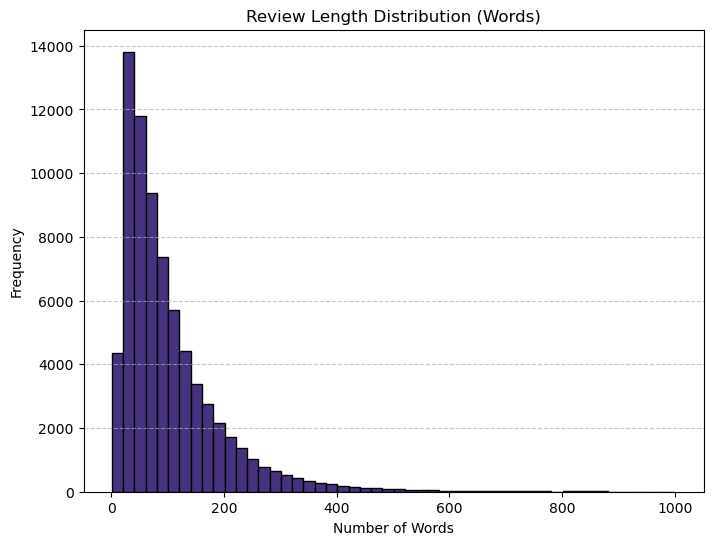

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(sushi_df['word_count'], bins=50, color=color_palette[0], edgecolor='black')
plt.title('Review Length Distribution (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

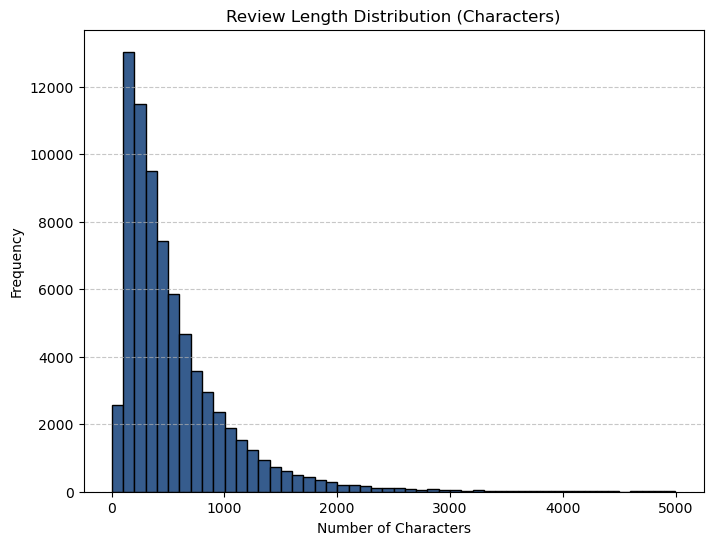

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(sushi_df['review_length'], bins=50, color=color_palette[1], edgecolor='black')
plt.title('Review Length Distribution (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**E. Unique Users**

In [ ]:
def count_unique_users(file_path):
    # Read the dataset into a DataFrame
    df = pd.read_csv(file_path)

    # Extract the 'user' column and find unique users
    unique_users = df['user_id'].unique()

    # Count the number of unique users
    unique_user_count = len(unique_users)

    return unique_user_count

# Example usage
dataset_file_path = 'filtered_sushi_pa_reviews.csv'
unique_user_count = count_unique_users(dataset_file_path)
print("Number of unique users in the dataset:", unique_user_count)

Number of unique users in the dataset: 44362


**F. Additonal EDA**

In [ ]:
average_stars_per_review = sushi_df['stars'].mean()
print(f"Average Stars per Review: {average_stars_per_review}")

sushi_df['votes'] = sushi_df['funny'] + sushi_df['cool'] + sushi_df['useful']
average_stars_per_review = sushi_df['votes'].mean()
print(f"Average votes per Review: {average_stars_per_review}")

Average Stars per Review: 3.8635820165486883
Average votes per Review: 1.7448132498199753


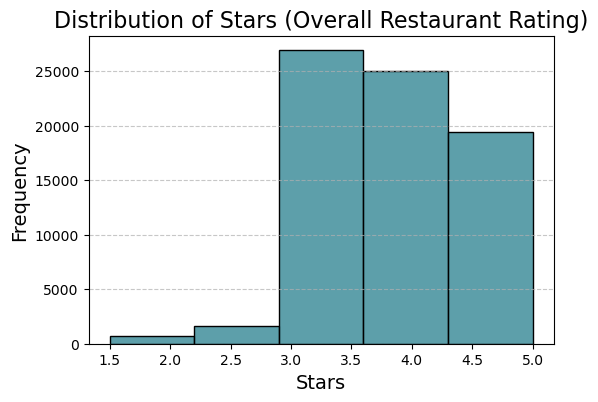

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(sushi_df['stars'], bins=5, kde=False, color=color_palette[2], edgecolor='black')
plt.title('Distribution of Stars (Overall Restaurant Rating)', fontsize=16)
plt.xlabel('Stars', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

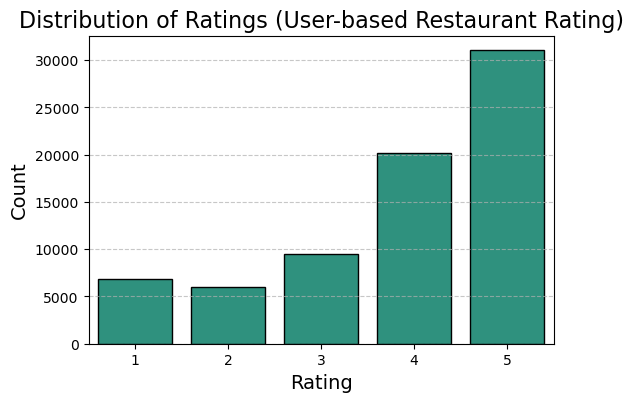

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='user_rating', data=sushi_df, palette=[color_palette[3]], edgecolor='black')
plt.title('Distribution of Ratings (User-based Restaurant Rating)', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

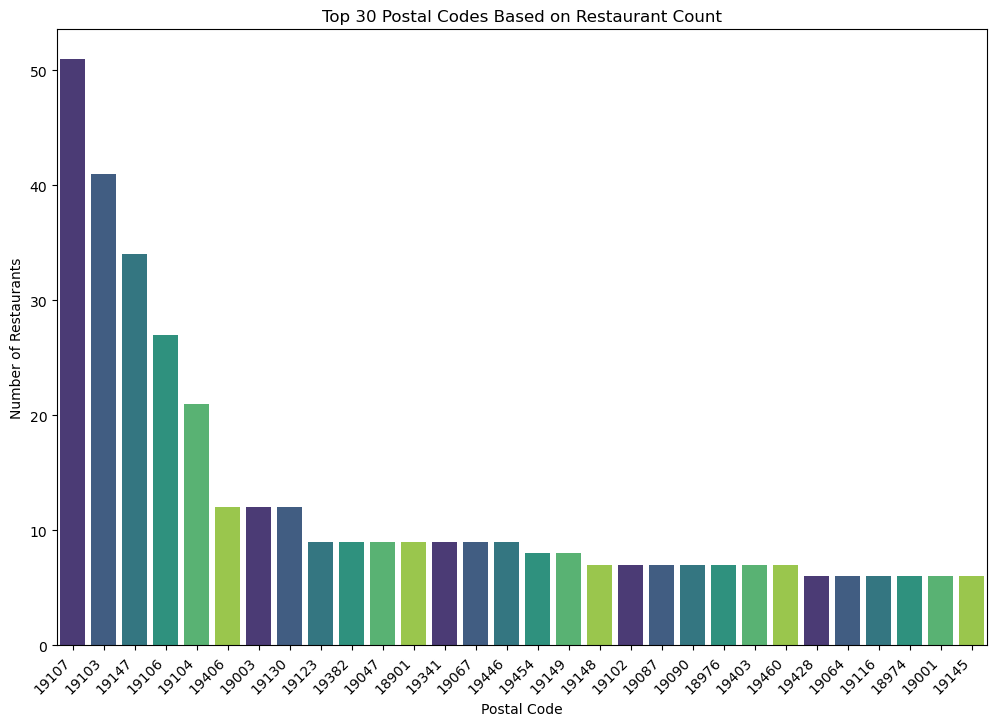

In [ ]:
restaurant_count_by_postal = sushi_df.groupby('postal_code')['business_id'].nunique().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=restaurant_count_by_postal.index, y=restaurant_count_by_postal.values, palette=color_palette, order=restaurant_count_by_postal.index)
plt.title('Top 30 Postal Codes Based on Restaurant Count')
plt.xlabel('Postal Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

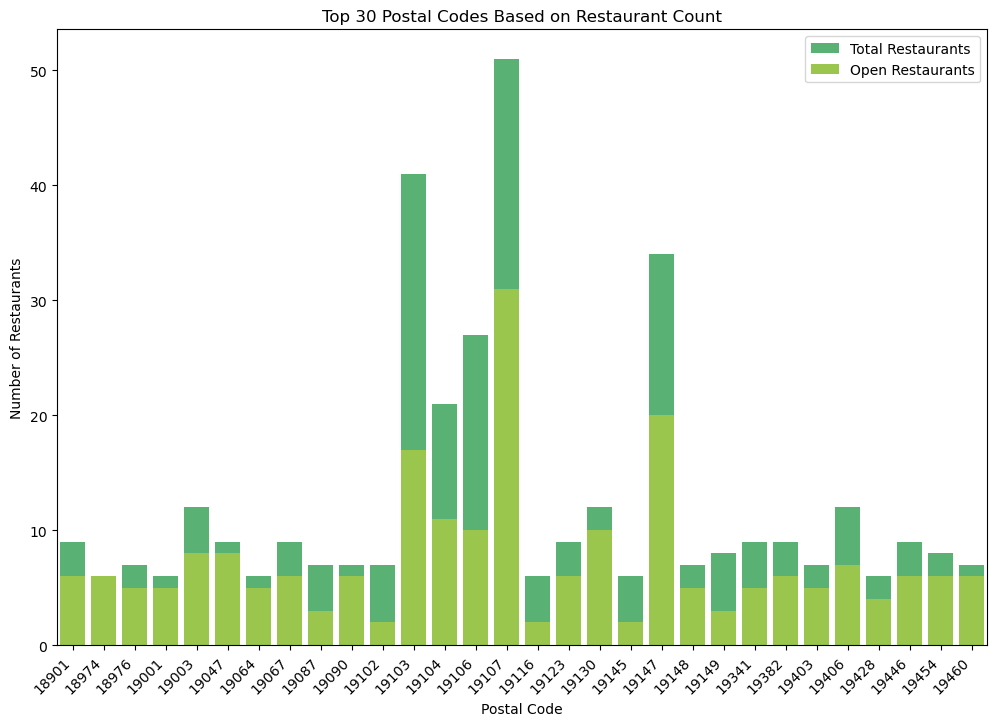

In [ ]:
restaurant_counts = sushi_df.drop_duplicates(subset=['business_id', 'postal_code']).groupby('postal_code').agg({'business_id': 'nunique', 'is_open': 'sum'}).sort_values(by='business_id', ascending=False).head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=restaurant_counts.index, y=restaurant_counts['business_id'], color=color_palette[4], label='Total Restaurants')
sns.barplot(x=restaurant_counts.index, y=restaurant_counts['is_open'], color=color_palette[5], label='Open Restaurants')
plt.title('Top 30 Postal Codes Based on Restaurant Count')
plt.xlabel('Postal Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [ ]:
open_sushi = sushi_df[sushi_df['is_open'] == 1].copy()
open_sushi = open_sushi.drop_duplicates(subset=['business_id', 'postal_code'])
print(open_sushi.head())

                 business_id             name                     address  \
0     MUTTqe8uqyMdBl186RmNeA         Tuna Bar                 205 Race St   
325   vPcfJ3rm3NpdqVDod2WxLA      China Pearl   2E Summit Sq Shopping Ctr   
616   Xjal8g4PsYinAfeQ8RWf4Q          Wasabi2  1375 Dilworthtown Crossing   
1030  2Q1R2OhBbAQ581vK_r7NhA  Ooka Restaurant              1109 Easton Rd   
1441  bRhnVTfuxDchyFguyDzuDQ      Queen Sushi           281 N Keswick Ave   

              city state  postal_code   latitude  longitude  stars  \
0     Philadelphia    PA        19106  39.953949 -75.143226    4.0   
325      Langhorne    PA        19047  40.217784 -74.926586    1.5   
616   West Chester    PA        19382  39.903753 -75.562592    4.5   
1030  Willow Grove    PA        19090  40.156669 -75.121837    4.0   
1441      Glenside    PA        19038  40.106143 -75.146928    3.5   

      review_count  ...                 user_id user_rating useful funny cool  \
0              245  ...  Qsk0aTclam

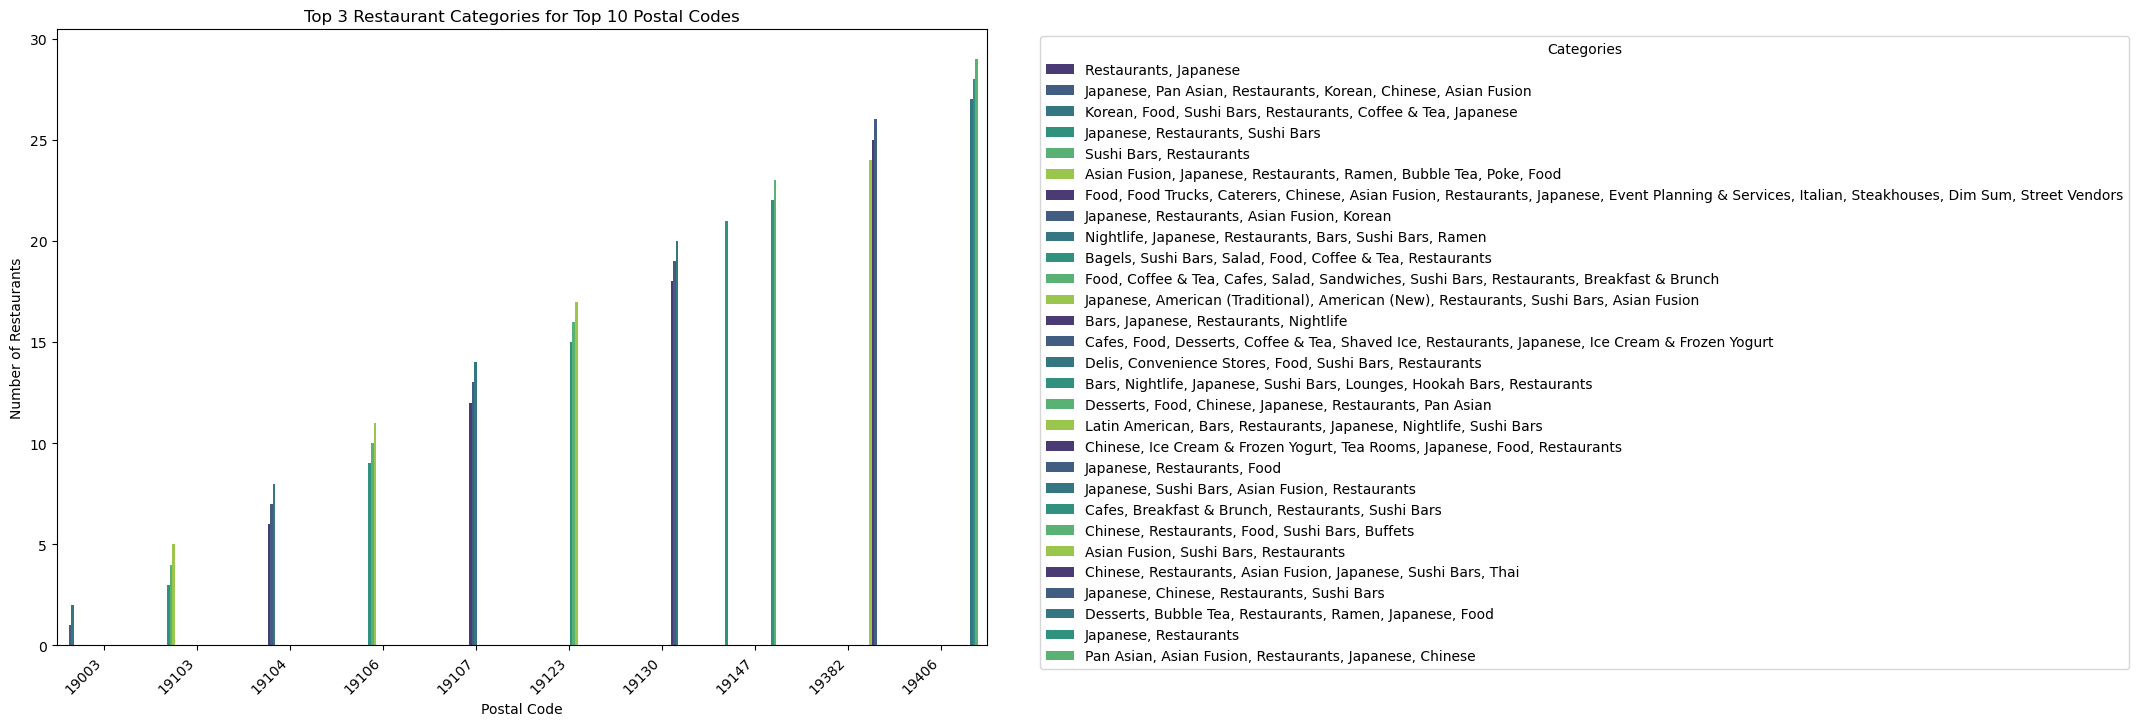

In [ ]:
top_postal_codes = restaurant_counts.head(10).index

open_sushi_top_postal = open_sushi[open_sushi['postal_code'].isin(top_postal_codes)]

top_categories_by_postal = open_sushi_top_postal.groupby(['postal_code', 'categories']).size().groupby('postal_code').nlargest(3).reset_index(level=0, drop=True)

top_categories_by_postal = top_categories_by_postal.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='postal_code', y=top_categories_by_postal.index, hue='categories', data=top_categories_by_postal, palette=color_palette)
plt.title('Top 3 Restaurant Categories for Top 10 Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**6. Data Evaluation**

***A. Dataset's Richness:*** The dataset's richness, evidenced by a diverse vocabulary (43,905 unique words) and extensive textual content (7,550,024 tokens), enhances its relevance for addressing key business questions. The inclusion of various review lengths and language expressions allows for a comprehensive understanding of customer sentiments and preferences regarding sushi restaurants in Penn State. The substantial number of unique users (44,362) in the dataset contributes to its relevance by capturing a broad spectrum of opinions and experiences. This diversity is crucial for ensuring that the insights derived from the data are representative of the varied customer base within Penn State.

***B. Sample Size and Diversity:*** The sample size is sufficiently large for conducting statistical analyses and drawing meaningful conclusions about customer sentiments, preferences, and trends. As for diversity, a dataset with a substantial number of reviews increases the range of customer experiences and opinions about sushi restaurants in Penn State. The dataset size is also suitable for training machine learning models effectively, allowing for robust sentiment analysis, topic modeling, and other predictive modeling tasks.

***C. Potential Biases:*** The dataset includes a substantial number of unique words (43,905) and tokens (7,550,024), indicating a diverse vocabulary and extensive textual content. However, potential biases may arise from variations in the review lengths and language usage. Longer reviews may carry more weight in sentiment analysis or topic modeling, potentially skewing results towards experiences that users felt compelled to express in more detail. Additionally, biases related to the distribution of unique users (44,362) should be considered, ensuring that the dataset adequately represents a diverse range of customers and doesn't disproportionately focus on specific individuals or demographics.

***D. Potential Challenges to Process the Data:***
   - **Missing Values:** The dataset contains missing values in the 'address,' 'attributes,' and 'hours' columns.
   - **Categorical Data:** The 'categories' column is categorical, and effective encoding or feature engineering may be necessary for certain machine learning algorithms.
   - **Timestamps:** The 'date' column is in timestamp format and may need to be converted into a more usable format for time-based analysis.
   - **Data Integrity:** Checking for duplicates, discrepancies, or outliers is crucial. Anomalies in the data could impact the accuracy of your analysis.
   - **Temporal Analysis:** Assess the temporal distribution of reviews to identify trends or seasonality. This can help in understanding if there are specific periods with higher or lower review activity.


**7. Preliminary Data Exploration**

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tokenizer = RegexpTokenizer(r'\w+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range=(1, 1),
                     tokenizer=tokenizer.tokenize,
                     token_pattern=None)

df = cv.fit_transform(sushi_df['text'])

**8. Proposed Solution:**



The analysis of the Yelp dataset provides valuable insights into the sushi restaurant market in various cities in the U.S. Several key observations can guide the decision-making process for Wasa-bee! in selecting an optimal location for its sushi bar restaurant.

**Review and User Engagement:**
The dataset contains a substantial number of reviews (73,601), indicating a significant level of user engagement. The average review length is 102 words, with a diverse range of reviews, contributing to a rich dataset for analysis.


**Geographic Distribution:**
The dataset covers multiple cities and states, allowing for a comprehensive assessment of potential locations. Top postal codes with higher restaurant counts (e.g., 19107, 19103, 19147) can be considered prime areas for establishing a new sushi bar.

**Demographics:**
The dataset includes reviews from a diverse user base, with 44,362 unique users contributing to the reviews. Understanding the preferences and feedback of this user base can help Wasa-bee! tailor its offerings to meet customer expectations. Recommendation for Top 10 Locations:

Based on the analysis, here are the top 10 locations that appear to be most suitable for opening a sushi restaurant:

19107: With 51 restaurants, this postal code has a high concentration of sushi establishments, indicating a strong market. 19103: Close behind with 41 restaurants, this area is another promising location for a sushi bar. 19147: With 34 restaurants, this postal code suggests a thriving sushi market. 19106: Boasting 27 restaurants, this area presents a favorable environment for a new sushi venture. 19104: With 21 restaurants, this postal code is also worth considering for its established sushi presence.

Additionally, further exploration of these locations, considering factors like foot traffic, nearby attractions, and competition density, will contribute to a more informed decision-making process.

In [ ]:
import os
print(os.getcwd())

C:\Users\nmtv2\Documents\CIS509\Wasa-Bee!


In [ ]:
!pip install jupyter
!pip install nbconvert
!jupyter nbconvert "C:\Users\nmtv2\Documents\CIS509\Wasa-Bee!\ProjectEDA_Wasa-Bee!.ipynb" --to html

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'C:\\Users\\nmtv2\\Documents\\CIS509\\Wasa-Bee!\\ProjectEDA_Wasa-Bee!.ipynb' matched no files
